# Quantum Teleportation

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend,shots=1000)
result = job.result()
counts = result.get_counts(qc)
print("\nTotal count are:\n",counts)
plot_histogram(counts)

In [2]:
from qiskit.extensions import Initialize
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import random_statevector

In [3]:
psi = random_statevector(2)
print('psi state: {}'.format(psi))
array_to_latex(psi)

psi state: Statevector([-0.12490132+0.37834786j,  0.61316354+0.68211658j],
            dims=(2,))


<IPython.core.display.Latex object>

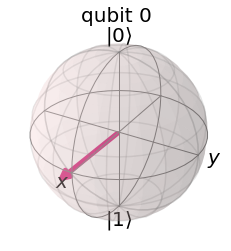

In [4]:
plot_bloch_multivector(psi)

In [5]:
init_state = Initialize(psi)
init_state.label = "initial_state"

In [6]:
#creating the Bell State
def bell_state(qc,a,b):
    qc.h(a)
    qc.cx(a,b)

In [7]:
#Alice applied CNOT Gate
def alice_gates(qc,psi,a):
    qc.cx(psi,a)
    qc.h(psi)

In [8]:
#Alice measuring Qubits
def measure_and_send(qc,a,b):
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

In [9]:
#Bob gates
def bob_gates(qc,qubit,crz,crx):
    qc.x(qubit).c_if(crx,1)
    qc.z(qubit).c_if(crz,1)

In [10]:
qc = QuantumRegister(3,name="qc")
crz = ClassicalRegister(1,name="crz")
crx = ClassicalRegister(1,name="crx")
qc = QuantumCircuit(qc,crz,crx)

In [11]:
qc.append(init_state,[0])
qc.barrier()

In [12]:
bell_state(qc,1,2)
qc.barrier()

In [13]:
alice_gates(qc,0,1)

In [14]:
measure_and_send(qc,0,1)

In [15]:
bob_gates(qc,2,crz,crx)

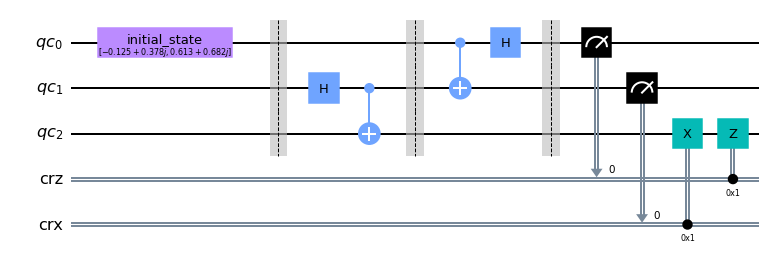

In [16]:
qc.draw('mpl')


Total count are:
 [ 0.   +0.j     0.   -0.j    -0.   +0.j    -0.125+0.378j  0.   -0.j
  0.   -0.j    -0.   +0.j     0.613+0.682j]


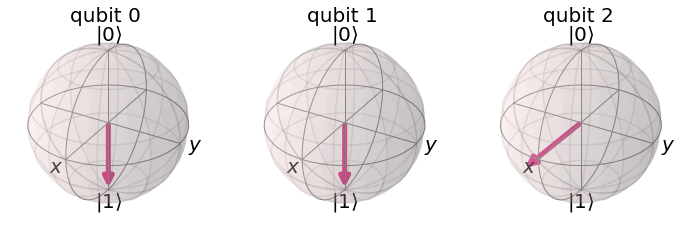

In [20]:
backend = Aer.get_backend('statevector_simulator')
result = execute(qc,backend).result().get_statevector(qc,decimals=3)
print("\nTotal count are:\n",result)
plot_bloch_multivector(result)


Total count are:
 {'0 0': 262, '1 0': 244, '0 1': 248, '1 1': 246}


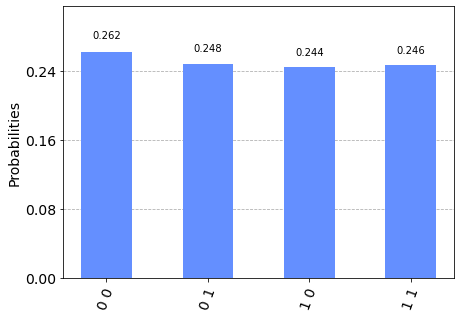

In [21]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc,backend,shots=1000)
result = job.result()
counts = result.get_counts(qc)
print("\nTotal count are:\n",counts)
plot_histogram(counts)